In [1]:
from tomo2mesh.structures.voids import VoidLayers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
fpath = '/data01/Eaton_Polymer_AM/voids_data/sample_1_all_layers_b4'
voids_all = VoidLayers().import_from_disk(fpath)


In [3]:
feret_dm = voids_all["max_feret"]["dia"]
eq_sph_dm = voids_all["max_feret"]["eq_sph"]
norm_dm = voids_all["max_feret"]["norm_dia"]
theta = voids_all["max_feret"]["theta"]
phi = voids_all["max_feret"]["phi"]

CUTOFF_CRACKS = 4
theta_adj = []
phi_adj = []
for i in range(len(norm_dm)):
    if norm_dm[i]>=CUTOFF_CRACKS:
        theta_adj.append(theta[i])
        phi_adj.append(phi[i])


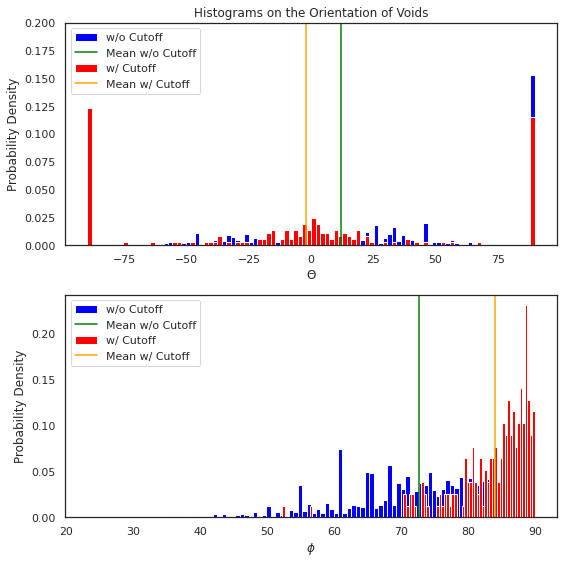

In [8]:
#Histogram of Orientation
labels = ["$d_{fe}$", "$d_{sp}$", "$d^{*}_{fe}$", "$\Theta$", "$\phi$"]
sns.set(font_scale=1.0)
sns.set_style(style = "white")
fig, ax = plt.subplots(2,1, figsize = (8,8))
hist1 = ax[0].hist(theta, bins=100, color = 'blue', density = True, label="w/o Cutoff")
mean1 = ax[0].axvline(np.mean(theta), color = "green", label="Mean w/o Cutoff")
hist2 = ax[0].hist(theta_adj, bins=100, color = 'red', density = True, label="w/ Cutoff")
mean2 = ax[0].axvline(np.mean(theta_adj), color = "orange", label="Mean w/ Cutoff")
hist3 = ax[1].hist(phi, bins=100, color = 'blue', density = True, label="w/o Cutoff")
mean3 = ax[1].axvline(np.mean(phi), color = "green", label="Mean w/o Cutoff")
hist4 = ax[1].hist(phi_adj, bins=100, color = 'red', density = True, label="w/ Cutoff")
mean4 = ax[1].axvline(np.mean(phi_adj), color = "orange", label="Mean w/ Cutoff")
ax[0].set_title("Histograms on the Orientation of Voids")
ax[0].set_xlabel(labels[3])
ax[1].set_xlabel(labels[4])
ax[0].set_ylabel("Probability Density")
ax[1].set_ylabel("Probability Density")
ax[0].set_ylim([0,0.20])
ax[0].legend()
ax[1].legend()
plt.tight_layout()


In [10]:
fpath1 = '/data01/Eaton_Polymer_AM/voids_data/sample_1_all_layers_b1_por_test'
voids_all1 = VoidLayers().import_from_disk(fpath1)

fpath4 = '/data01/Eaton_Polymer_AM/voids_data/sample_1_all_layers_b4'
voids_all4 = VoidLayers().import_from_disk(fpath4)


In [11]:
void1 = max(voids_all1["sizes"])
void4 = max(voids_all4["sizes"])

print(void1)
print(void4)

6340522
6328199


In [12]:
print(len(voids_all1["sizes"]))
print(len(voids_all4["sizes"]))

710281
142247


In [19]:
voids_all1["sizes"]

array([6340522,    2379,      44, ...,      35,      78,     142])

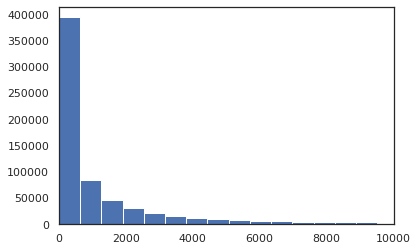

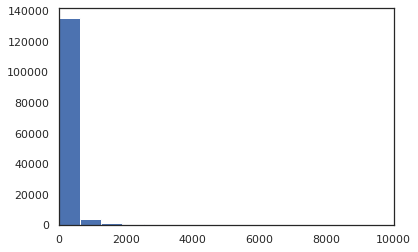

In [33]:
plt.hist(voids_all1["sizes"], bins = 10000)
plt.xlim([0,10000])
plt.show()

plt.hist(voids_all4["sizes"], bins = 10000)
plt.xlim([0,10000])
plt.show()


In [37]:
print(np.sum(voids_all1["x_voids"][np.argmax(voids_all1["sizes"])]))
print(np.sum(voids_all4["x_voids"][np.argmax(voids_all4["sizes"])]))

6340522
6328199


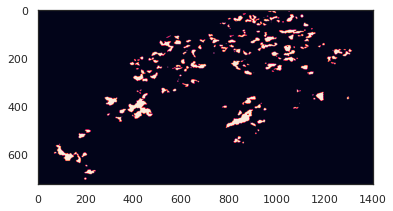

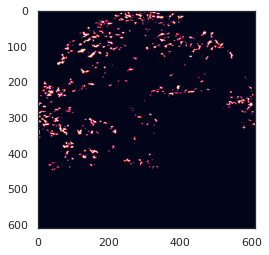

In [43]:
ind = 100

plt.imshow(voids_all1["x_voids"][np.argmax(voids_all1["sizes"])][ind])
plt.show()

plt.imshow(voids_all4["x_voids"][np.argmax(voids_all4["sizes"])][ind])
plt.show()

In [44]:
voids_all1["x_voids"][np.argmax(voids_all1["sizes"])].shape

(214, 728, 1401)

In [45]:
voids_all4["x_voids"][np.argmax(voids_all4["sizes"])].shape

(384, 611, 611)